In [1]:
from keras.datasets import imdb

In [2]:
# Dataset Preparation

In [3]:
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
print(len(XT))
print(len(Xt))

25000
25000


In [5]:
print(XT[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
word_idx = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [7]:
# print(word_idx.items())

In [8]:
idx_word = dict([value,key] for (key,value) in word_idx.items())

In [9]:
# print(idx_word.items())

In [10]:
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])

In [11]:
print(actual_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [12]:
## Vectorize the Data
## Since Vocab Size is 10000 , We will make sure every sentence is represented by a vector of length 10000

In [13]:
import numpy as np

In [14]:
def vectorize_sentences(sentences,dim=10000):
  outputs = np.zeros((len(sentences),dim))

  for i,idx in enumerate(sentences):
    outputs[i,idx]=1

  return outputs  


In [15]:
X_train = vectorize_sentences(XT)
X_test = vectorize_sentences(Xt)

In [16]:
print(X_train.shape)
print(X_test.shape)

(25000, 10000)
(25000, 10000)


In [17]:
Y_train = np.asarray(YT).astype("float32")
Y_test = np.asarray(Yt).astype("float32")

# DEFINE YOUR MODEL ARCH.



> -- RELU ACTIVATION

>-- 2 HIDDEN LAYERS WITH 16 UNITS EACH

>-- 1 OUTPUT LAYER WITH 1 UNIT(SIGMOID ACTIVATION)







In [41]:
from keras import models
from keras.layers import Dense

In [42]:
# Model Defined
model = models.Sequential()
model.add(Dense(16,activation="relu",input_shape =(10000,)))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))


In [43]:
# Compile the Model
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])



In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                160016    
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


**TRAINING AND VALIDATION**



In [45]:
x_val = X_train[:5000]
x_train_new = X_train[5000:]

y_val = Y_train[:5000]
y_train_new = Y_train[5000:]

## now we have out of 25000 examples in training set
## 5000 examples in valid set and rest 20000 examples in new training set


In [46]:
## Fitting and training
hist=model.fit(x_train_new,y_train_new,epochs=4,batch_size=512,validation_data=(x_val,y_val))


Epoch 1/4
40/40 [==============================] - 1s 23ms/step - loss: 0.4807 - accuracy: 0.8121 - val_loss: 0.4003 - val_accuracy: 0.8324
Epoch 2/4
40/40 [==============================] - 1s 15ms/step - loss: 0.2831 - accuracy: 0.9083 - val_loss: 0.3156 - val_accuracy: 0.8752
Epoch 3/4
40/40 [==============================] - 1s 15ms/step - loss: 0.2128 - accuracy: 0.9291 - val_loss: 0.2834 - val_accuracy: 0.8886
Epoch 4/4
40/40 [==============================] - 1s 15ms/step - loss: 0.1722 - accuracy: 0.9420 - val_loss: 0.2866 - val_accuracy: 0.8852


**VISUALISATION**

In [47]:
import matplotlib.pyplot as plt

In [48]:
h=hist.history
## it is a dict which contains various keys like accuracy,loss,val_accuracy etc..

In [49]:
plt.style.use("seaborn")

These two graphs when we ran for 20 epochs clearly showing overfitting

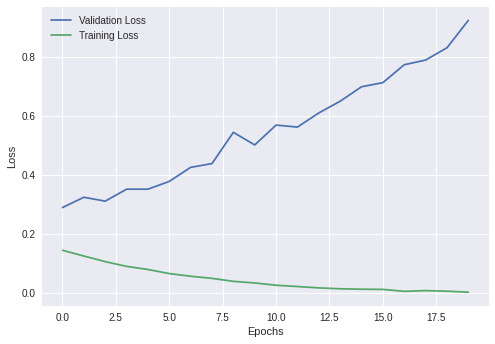

In [29]:
plt.plot(h["val_loss"],label = "Validation Loss")
plt.plot(h["loss"],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

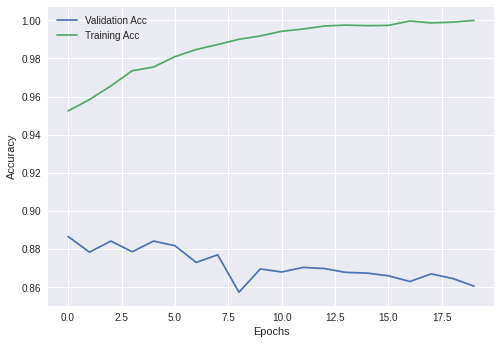

In [30]:
plt.plot(h["val_accuracy"],label = "Validation Acc")
plt.plot(h["accuracy"],label = "Training Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

These two graphs that we just ran for 4 epochs to avoid overfitting and our model is giving pretty good results

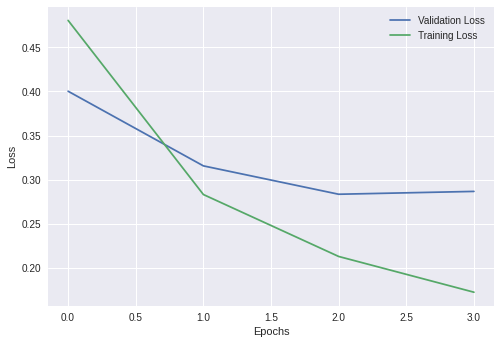

In [50]:
plt.plot(h["val_loss"],label = "Validation Loss")
plt.plot(h["loss"],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

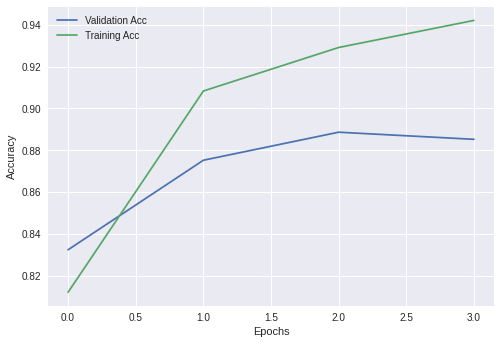

In [51]:
plt.plot(h["val_accuracy"],label = "Validation Acc")
plt.plot(h["accuracy"],label = "Training Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [52]:
model.evaluate(X_test,Y_test)[1] ##--> accuracy

782/782 [==============================] - 2s 3ms/step - loss: 0.3033 - accuracy: 0.8786


0.8786399960517883

In [53]:
model.evaluate(x_train_new,y_train_new)[1] ##--> accuracy

625/625 [==============================] - 2s 3ms/step - loss: 0.1483 - accuracy: 0.9503


0.9503499865531921

In [54]:
## reducing the no. of epochs to avoid overfitting--> early stopping

In [55]:
model.predict(X_test)

array([[0.3271796 ],
       [0.99894315],
       [0.94759804],
       ...,
       [0.13714753],
       [0.12416845],
       [0.7334254 ]], dtype=float32)

In [56]:
model.predict(X_test[1].reshape(1,-1))

array([[0.99894315]], dtype=float32)